In [1]:
%config InlineBackend.figure_formats = ['retina']

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import category_encoders as ce

In [2]:
oscars_df = pd.read_csv('oscar_movies_data.csv')

In [3]:
oscars_df.describe()

,Unnamed: 0,runtime (mins),metacritic score,budget,Total_Noms
count,3303.000000,3303.000000,3303.000000,3.223000e+03,3303.000000
mean,1788.924311,127.243112,76.183470,4.504520e+07,5.398728
std,1049.322783,23.834388,12.732737,4.926863e+07,3.500535
min,0.000000,70.000000,16.000000,6.500000e+04,1.000000
25%,886.500000,111.000000,68.000000,1.400000e+07,2.000000
50%,1781.000000,124.000000,78.000000,2.700000e+07,5.000000
75%,2649.500000,139.000000,86.000000,5.500000e+07,8.000000
max,3711.000000,224.000000,100.000000,3.210000e+08,16.000000


In [4]:
oscars_df.shape

(3303, 23)

In [5]:
oscars_df.drop(columns = ['Unnamed: 0','genre'],inplace=True)

<Figure size 2880x2880 with 0 Axes>

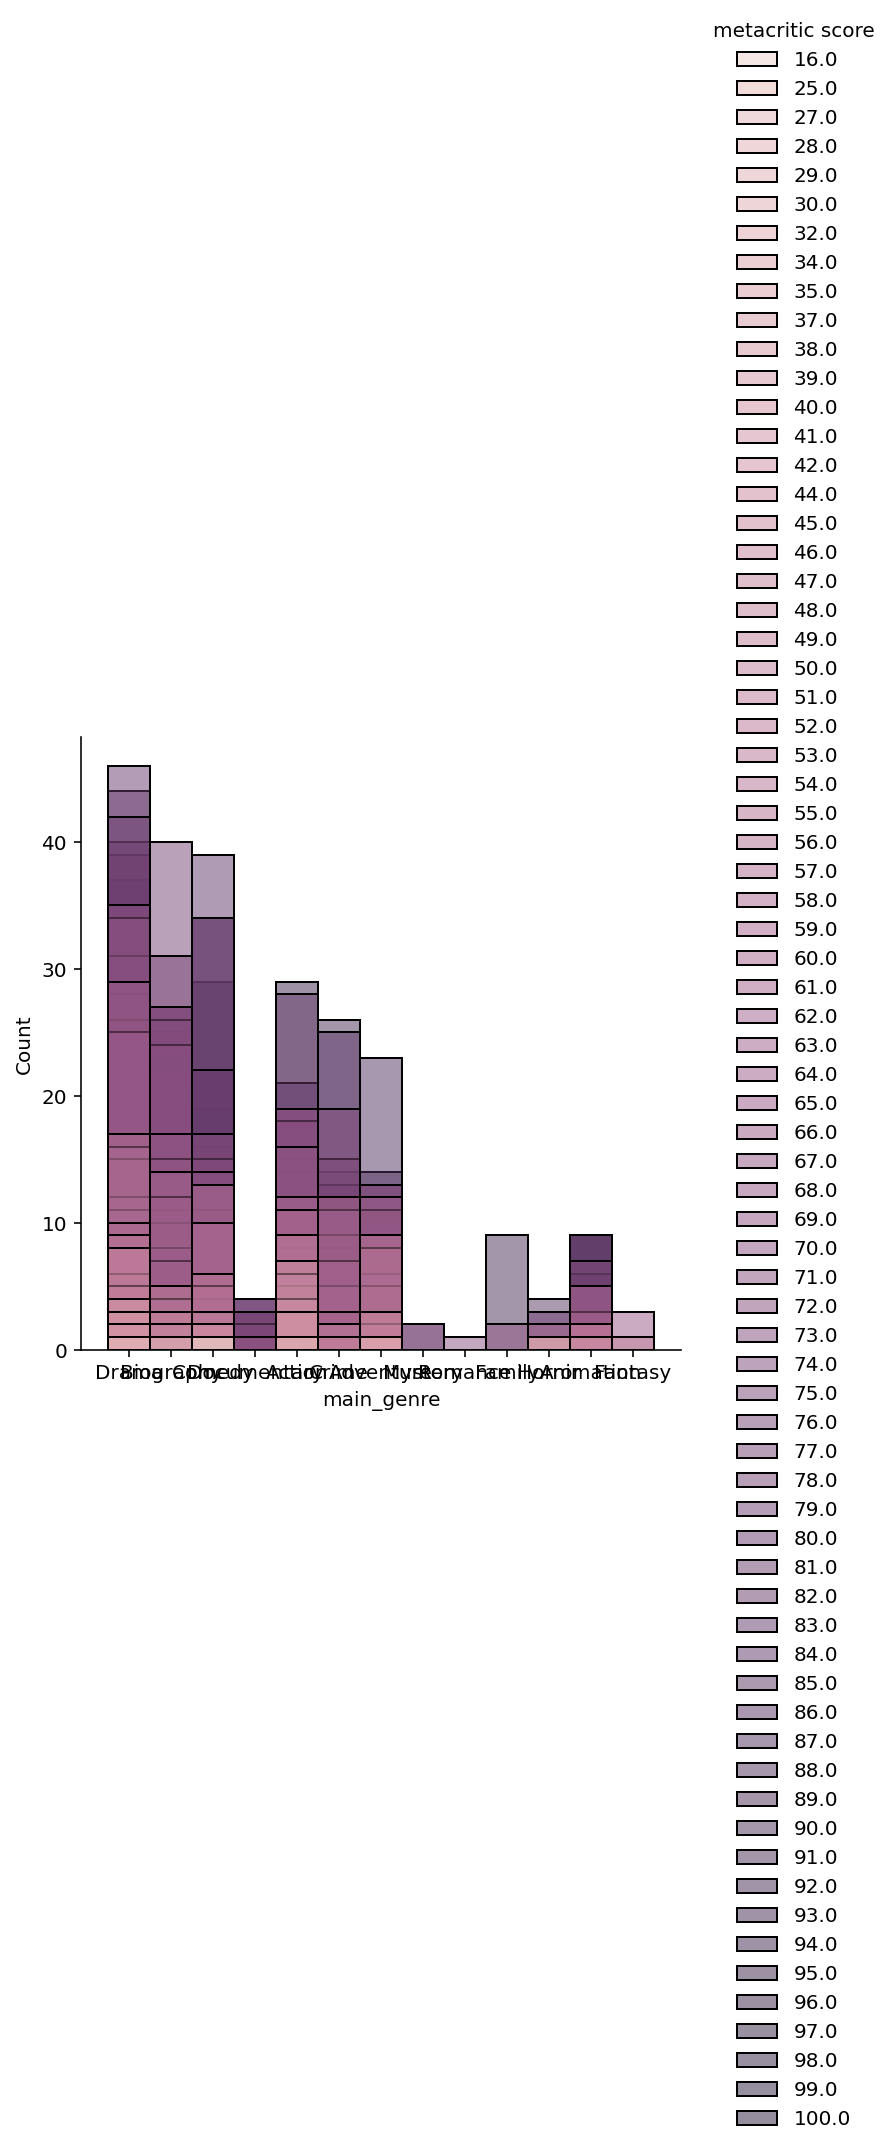

In [6]:
plt.figure(figsize=(40,40))
sns.displot(oscars_df, x="main_genre", hue="metacritic score");

## Encode variables using target encoding

In [7]:
oscars_df['Awards']

0                         Best Actor in a Supporting Role
1                                     Best Cinematography
2                                           Best Director
3                                       Best Film Editing
4                                            Best Picture
                              ...                        
3298    Best Achievement in Music Written for Motion P...
3299                           Best Music, Original Score
3300                                         Best Picture
3301    Best Writing, Screenplay Based on Material fro...
3302                      Best Music, Original Song Score
Name: Awards, Length: 3303, dtype: object

In [14]:
ce_target = ce.TargetEncoder(cols = ['Awards'])
ce_target.fit(oscars_df, oscars_df['metacritic score'])

oscars_df = ce_target.transform(oscars_df, oscars_df['metacritic score'])

/Users/sibongiletoure/anaconda3/envs/metis/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [9]:
oscars_df.drop_duplicates(subset=['IMDBId'],inplace=True)

In [10]:
oscars_df.columns

Index(['IMDBId', 'movie title', 'language', 'country', 'runtime (mins)',
       'mpaarating', 'metacritic score', 'budget', 'distributionCompany',
       'Awards', 'Total_Noms', 'writer1', 'writer2', 'director', 'Lead_Actor',
       'Supporting_Actor_1', 'Supporting_Actor_2', 'main_genre', 'subgenre',
       'release_date', 'season'],
      dtype='object')

In [12]:
ce_target = ce.TargetEncoder(cols = ['language', 'country','mpaarating','distributionCompany',\
        'Total_Noms', 'writer1', 'writer2', 'director', 'Lead_Actor',\
       'Supporting_Actor_1', 'Supporting_Actor_2', 'main_genre',\
       'subgenre', 'season'])
ce_target.fit(oscars_df, oscars_df['metacritic score'])

oscars_df = ce_target.transform(oscars_df, oscars_df['metacritic score'])

In [15]:
oscars_df

,IMDBId,movie title,language,country,runtime (mins),mpaarating,metacritic score,budget,distributionCompany,Awards,...,writer1,writer2,director,Lead_Actor,Supporting_Actor_1,Supporting_Actor_2,main_genre,subgenre,release_date,season
0,tt0091763,Platoon,71.120619,70.506089,120,74.001873,92.0,6.000000e+06,69.952381,73.363636,...,77.001152,73.797909,71.669457,73.484608,72.083627,79.072003,72.557927,80.722222,1987-02-06,72.633621
7,tt0082979,Reds,71.120619,70.506089,195,69.613208,76.0,3.200000e+07,66.970297,75.457944,...,74.581196,72.083627,72.890766,74.623545,71.289535,72.083627,73.738095,73.585784,1981-12-25,72.633621
19,tt0084434,An Officer and a Gentleman,71.120619,70.506089,124,74.001873,75.0,7.500000e+06,66.970297,73.363636,...,72.083627,73.797909,73.484608,59.620502,75.677784,72.083627,72.557927,69.695652,1982-08-13,72.345992
25,tt0119360,In & Out,71.120619,70.506089,90,69.286645,70.0,3.500000e+07,66.970297,68.264706,...,72.083627,73.797909,74.581196,68.367198,72.083627,72.083627,72.178010,69.695652,1997-09-19,72.531250
26,tt0292542,Son of the Bride,78.125000,74.861688,123,74.001873,68.0,1.193676e+07,79.954545,70.656250,...,72.083627,72.083627,73.484608,73.484608,72.083627,72.083627,72.178010,73.585784,2001-08-16,72.345992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,tt0298203,8 Mile,71.120619,70.506089,110,74.001873,77.0,4.100000e+07,67.139535,59.228571,...,76.408842,73.797909,79.056345,72.083627,75.677784,72.753549,72.557927,68.516129,2002-11-08,72.531250
3293,tt0162661,Sleepy Hollow,71.120619,75.500000,105,74.001873,65.0,1.000000e+08,66.970297,68.918919,...,72.083627,72.083627,68.727425,68.000504,70.194844,68.780379,59.594495,69.400331,1999-11-19,72.531250
3296,tt0293508,The Phantom of the Opera,71.120619,72.402685,143,69.286645,40.0,7.000000e+07,68.949495,72.000000,...,72.083627,72.083627,53.666914,72.083627,72.083627,61.422141,72.557927,54.617685,2004-12-10,72.633621
3299,tt0097351,Field of Dreams,71.120619,70.506089,107,69.613208,57.0,4.425875e+07,67.139535,59.273309,...,72.083627,72.083627,72.083627,61.736386,72.083627,72.083627,72.557927,69.320000,1989-05-05,68.078261


In [20]:
oscars_df.to_csv('oscars_target_encoded.csv',encoding='utf-8-sig')